In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("E:/marriage.csv")

In [3]:
df.head()

,Year,Gender,Age Group,Metric,Estimated Percent,Estimated Population
0,2008,Male,15 to 19 years,Total,1.0,11241214
1,2008,Male,20 to 34 years,Total,1.0,31342886
2,2008,Male,35 to 44 years,Total,1.0,21426309
3,2008,Male,45 to 54 years,Total,1.0,21889603
4,2008,Male,55 to 64 years,Total,1.0,16251184


In [59]:
df.tail()

,Gender,Age Group,Metric,Estimated Percent,Estimated Population
931,0,1,2,0.597,19439915
932,0,2,2,0.201,4115792
933,0,3,2,0.131,2881218
934,0,4,2,0.093,1931038
935,0,5,2,0.051,1321023


In [4]:
df.describe()

,Year,Estimated Percent,Estimated Population
count,936.000000,936.000000,9.360000e+02
mean,2011.000000,0.333333,6.936859e+06
std,3.743658,0.383275,8.323534e+06
min,2005.000000,0.000000,0.000000e+00
25%,2008.000000,0.025000,4.806748e+05
50%,2011.000000,0.130500,2.596156e+06
75%,2014.000000,0.635000,1.201978e+07
max,2017.000000,1.000000,3.402447e+07


In [65]:
df.shape

(936, 5)

In [63]:
df.count()

Gender                  936
Age Group               936
Metric                  936
Estimated Percent       936
Estimated Population    936
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Year                    0
Gender                  0
Age Group               0
Metric                  0
Estimated Percent       0
Estimated Population    0
dtype: int64

In [58]:
df.dtypes

Gender                    int32
Age Group                 int32
Metric                    int32
Estimated Percent       float64
Estimated Population      int64
dtype: object

In [8]:
x=df["Estimated Population"]


In [9]:
from sklearn.preprocessing import LabelEncoder


In [10]:
le=LabelEncoder()
df["Age Group"]=le.fit_transform(df["Age Group"])
df["Gender"]=le.fit_transform(df["Gender"])
df["Metric"]=le.fit_transform(df["Metric"])

In [11]:
df.head()

,Year,Gender,Age Group,Metric,Estimated Percent,Estimated Population
0,2008,1,0,4,1.0,11241214
1,2008,1,1,4,1.0,31342886
2,2008,1,2,4,1.0,21426309
3,2008,1,3,4,1.0,21889603
4,2008,1,4,4,1.0,16251184


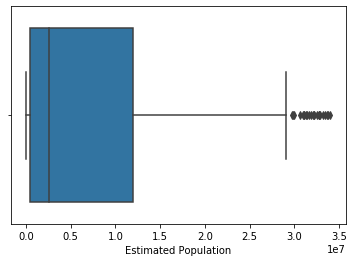

In [73]:
x=df["Estimated Population"]
sns.boxplot(x)

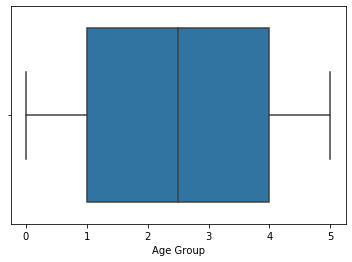

In [72]:
sns.boxplot(x=df["Age Group"])

In [68]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Gender                         1.00
Age Group                      3.00
Metric                         3.00
Estimated Percent              0.61
Estimated Population    11539102.50
dtype: float64


,Year,Gender,Age Group,Metric,Estimated Percent,Estimated Population
Year,1.000000,0.000000e+00,0.000000,0.000000,-2.459778e-05,0.033395
Gender,0.000000,1.000000e+00,0.000000,0.000000,6.812067e-18,-0.020986
Age Group,0.000000,0.000000e+00,1.000000,0.000000,2.122980e-05,0.026273
Metric,0.000000,0.000000e+00,0.000000,1.000000,1.300489e-01,0.121115
Estimated Percent,-0.000025,6.812067e-18,0.000021,0.130049,1.000000e+00,0.913035
Estimated Population,0.033395,-2.098576e-02,0.026273,0.121115,9.130350e-01,1.000000


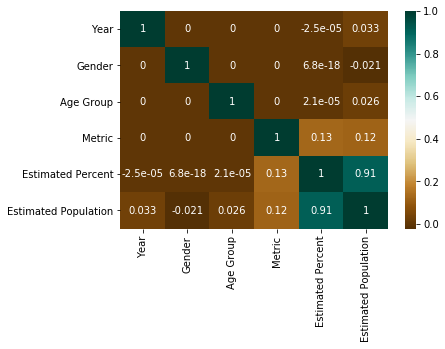

In [12]:
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

C:\Users\tharu\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


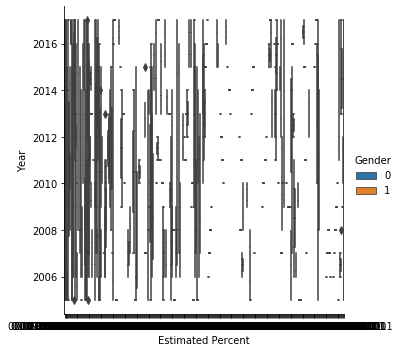

In [13]:
g = sns.factorplot("Estimated Percent", "Year", "Gender", data=df, kind="box")
    

<BarContainer object of 936 artists>

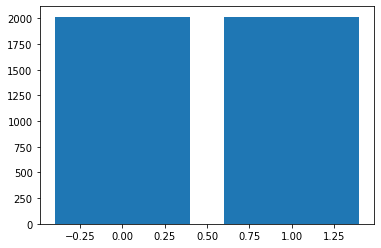

In [14]:
plt.bar("Gender","Year",data=df)

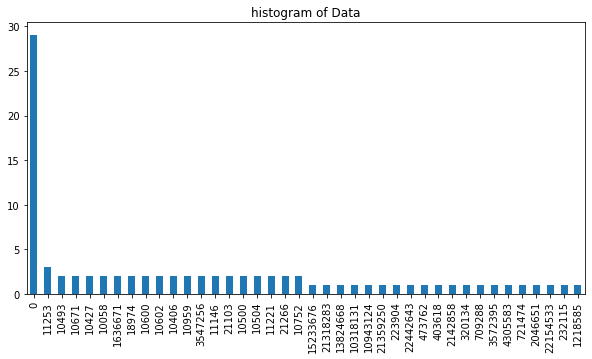

In [40]:
df["Estimated Population"].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("histogram of Data")
plt.show()

In [15]:
df.head()

,Year,Gender,Age Group,Metric,Estimated Percent,Estimated Population
0,2008,1,0,4,1.0,11241214
1,2008,1,1,4,1.0,31342886
2,2008,1,2,4,1.0,21426309
3,2008,1,3,4,1.0,21889603
4,2008,1,4,4,1.0,16251184


In [16]:
df=df.drop(["Year"],1)

In [17]:
df.keys()

Index(['Gender', 'Age Group', 'Metric', 'Estimated Percent',
       'Estimated Population'],
      dtype='object')

In [18]:
X=df.drop(["Metric"],axis=1)
y=df["Metric"]

In [81]:
y.head()

0    4
1    4
2    4
3    4
4    4
Name: Metric, dtype: int32

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [107]:
rfr=RandomForestClassifier()

In [108]:
y_test.head(2)

825    5
236    1
Name: Metric, dtype: int32

In [109]:
rfr.fit(X_train,y_train)

C:\Users\tharu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
pred=rfr.predict(X_test)

In [111]:
rfr.score(X_test,y_test)

0.9095744680851063

In [112]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [113]:
cm=confusion_matrix(y_test,pred)
print(cm)

[[21  0  0  2  0  2]
 [ 0 31  2  0  0  0]
 [ 0  0 34  0  0  3]
 [ 4  0  0 29  0  3]
 [ 0  0  0  0 30  0]
 [ 0  0  0  1  0 26]]


In [114]:
accuracy=accuracy_score(y_test,pred)

In [115]:
report=classification_report(y_test,pred,labels=[1,2,3,5])
print(report)

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        33
           2       0.94      0.92      0.93        37
           3       0.91      0.81      0.85        36
           5       0.76      0.96      0.85        27

   micro avg       0.90      0.90      0.90       133
   macro avg       0.90      0.91      0.90       133
weighted avg       0.91      0.90      0.90       133



In [116]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [117]:
accuracies=cross_val_score(estimator=rfr,X=X_train,y=y_train,cv=10)

In [118]:
y_pred=cross_val_predict(rfr, X, y, cv=3)

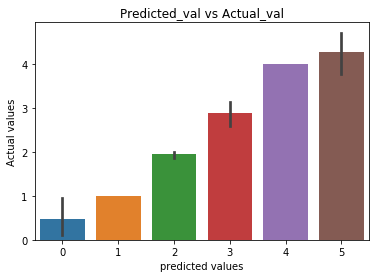

In [119]:
sns.barplot(pred,y_test)
plt.title("Predicted_val vs Actual_val")
plt.xlabel("predicted values")
plt.ylabel("Actual values")
plt.show()

In [120]:
from sklearn.naive_bayes import GaussianNB

In [121]:
classifier=GaussianNB()

In [122]:
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [125]:
pred1=classifier.predict(X_test)

In [126]:
classifier.score(X_test,y_test)

0.6117021276595744

In [128]:
rep=classification_report(y_test,pred1)
print(rep)

              precision    recall  f1-score   support

           0       0.41      0.80      0.54        25
           1       0.75      0.82      0.78        33
           2       1.00      0.05      0.10        37
           3       0.53      1.00      0.69        36
           4       1.00      1.00      1.00        30
           5       0.00      0.00      0.00        27

    accuracy                           0.61       188
   macro avg       0.61      0.61      0.52       188
weighted avg       0.64      0.61      0.52       188



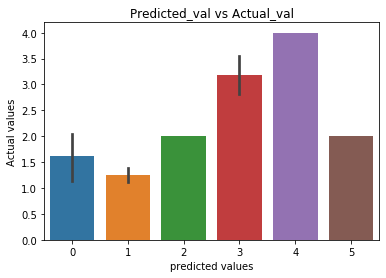

In [129]:
sns.barplot(pred1,y_test)
plt.title("Predicted_val vs Actual_val")
plt.xlabel("predicted values")
plt.ylabel("Actual values")
plt.show()

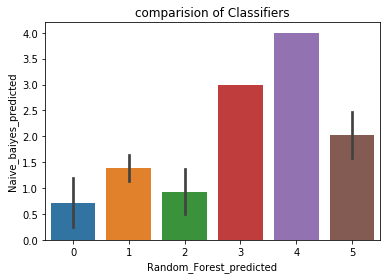

In [132]:
sns.barplot(pred,pred1)
plt.title("comparision of Classifiers")
plt.xlabel("Random_Forest_predicted")
plt.ylabel("Naive_baiyes_predicted")
plt.show()